## What does SingleM find compared to Sourmash?
- Take 50 least explained metaGs: Give to SingleM. 
- Take 50 most explained metaGs as well
- Compare SingleM and Sourmash output
https://hackmd.io/IwiPIg15Ro2GAkCJPcd-OQ?meta-config=general

In [2]:
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from functools import reduce
import matplotlib.pyplot as plt

In [5]:
# df = pd.read_csv('../data/250910_singleM_sourmash.comp.norank.csv')

# df = df[df["rank"] == "class"]

In [25]:
# compare 50 most and least exp to singlem result
dfl = pd.read_csv('../data/250917_singleM_sourmash.comp.class.50least.csv')
dfm = pd.read_csv('../data/250918_singleM_sourmash.comp.class.50most.csv')

dfl["expl"] = "least"
dfm["expl"] = "most"
df = pd.concat([dfl,dfm])
df= df[df["rank"] == "class"]



In [26]:
df["name"].value_counts()

name
c__Bacteroidia            99
c__Gammaproteobacteria    99
c__Bacilli                99
c__Clostridia             99
c__Actinomycetes          99
                          ..
c__JACRHL01                1
c__Methanococci            1
c__DTU065                  1
c__AC-67                   1
c__Vulcanimicrobiia        1
Name: count, Length: 234, dtype: int64

In [33]:
# keep classes in over 10 samples
counts = df["name"].value_counts()
keep = counts[counts > 10].index
len(keep)

78

In [34]:
df = df[df["name"].isin(keep)]

/var/folders/b5/q0xwwzss4dd82xbt_8lh5qph0000gn/T/ipykernel_24753/2980609128.py:12: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=df, x="name", y="diff", hue="expl", order=median_order,


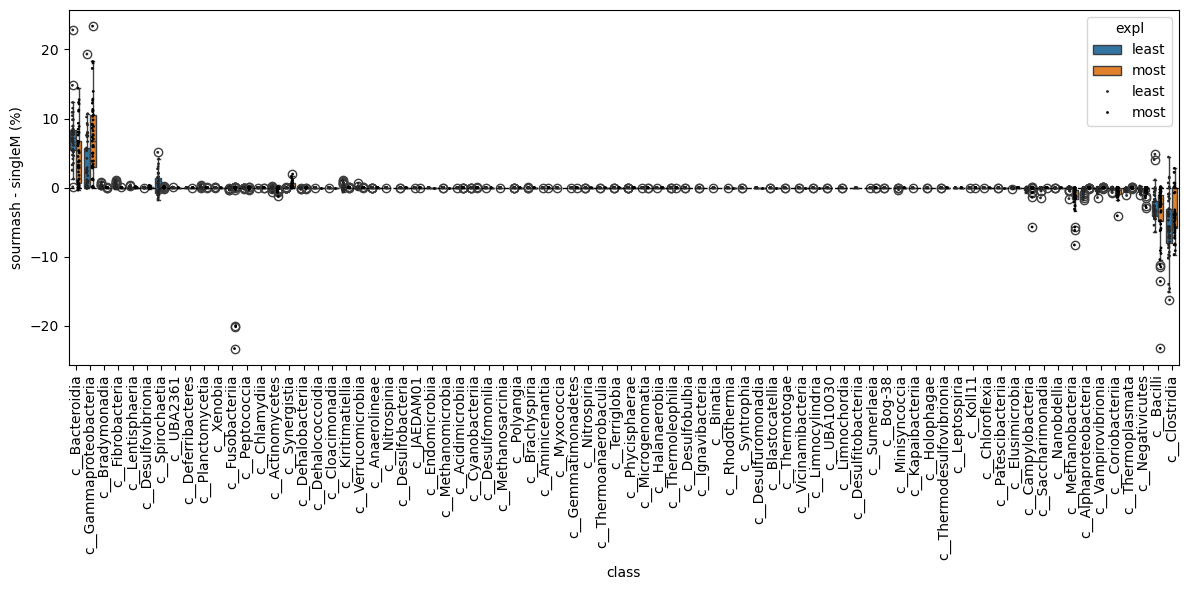

In [41]:
create_plot2(df,"class")

In [40]:
# compare most and least explained as 2 sep boxplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_plot2(df1, rank):

    median_order = df.groupby("name")["diff"].median().sort_values(ascending=False).index

    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x="name", y="diff", hue="expl", order=median_order)
    sns.stripplot(data=df, x="name", y="diff", hue="expl", order=median_order,
                  dodge=True, size=2, jitter=True, color="black")
    plt.axhline(0, color="black", linestyle="--", linewidth=1)  # <-- horizontal line


    plt.xticks(rotation=90)
    plt.ylabel("sourmash - singleM (%)")
    plt.xlabel(rank)
    plt.tight_layout()
    plt.savefig('../plots/251001_smashvSingleM.2box.png')


In [38]:
# compare all together into one boxplot
def create_plot(df, rank):
    df = df[df["rank"] == rank]
    meadian_order = df.groupby("name")["diff"].median().sort_values(ascending=False).index
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x="name", y="diff", order=meadian_order, color="lightgray")
    sns.stripplot(data=df, x="name", y="diff", order=meadian_order, color="black", size=2, jitter=True)
    plt.xticks(rotation=90)
    plt.ylabel("sourmash - singleM (%)")
    plt.xlabel(rank)

    plt.tight_layout()
    plt.savefig('../plots/251001_smashvSingleM.singlebox.png')

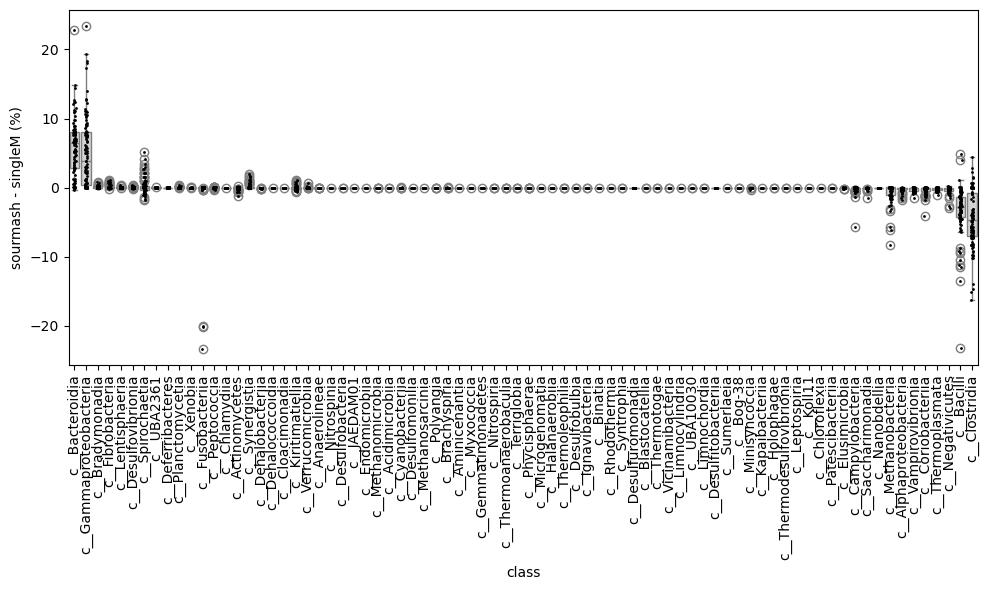

In [42]:
create_plot(df, "class")

In [7]:
def create_plot(df, rank):
    df = df[df["rank"] == rank]
    counts = df["name"].value_counts()
    df = df[df["name"].isin(counts[counts > 1].index)]

    median_order = df.groupby("name")["diff"].median().sort_values(ascending=False).index

    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x="name", y="diff", order=median_order, color="lightgray")
    sns.stripplot(data=df, x="name", y="diff", order=median_order, color="black", size=2, jitter=True)
    plt.xticks(rotation=90)
    plt.ylabel("sourmash - singleM (%)")
    plt.xlabel(rank)
    plt.tight_layout()
    # plt.savefig('../plots/250905_singleM.v.sourmash.png')


## What are common class dist in our metaGs?

In [15]:
df = pd.read_csv('../data/250905_singleM_sourmash.comp.csv')

df = df[df["rank"] == "class"]

In [16]:
df2 = pd.read_csv('../data/250905_tax_class.singlem.csv')
df2.head()

,query_name,rank,fraction,lineage,query_md5,query_filename,f_weighted_at_rank,bp_match_at_rank,query_ani_at_rank,total_weighted_hashes
0,ERR1135178,class,0.335829,d__Bacteria;p__Bacillota;c__Clostridia,23abeedc,-,0.226507,361460000,0.965414,404363
1,ERR1135178,class,0.163316,d__Bacteria;p__Bacteroidota;c__Bacteroidia,23abeedc,-,0.424104,175780000,0.943222,404363
2,ERR1135178,class,0.053664,d__Bacteria;p__Bacillota;c__Bacilli,23abeedc,-,0.042739,57760000,0.909960,404363
3,ERR1135178,class,0.016547,d__Bacteria;p__Cyanobacteriota;c__Vampirovibri...,23abeedc,-,0.014616,17810000,0.876071,404363
4,ERR1135178,class,0.015934,d__Bacteria;p__Bacillota;c__Negativicutes,23abeedc,-,0.035307,17150000,0.875005,404363


In [17]:
df_h = pd.read_csv('../data/250905_least_expl.50.csv')


In [18]:
df2['f_weighted_at_rank'] =  df2['f_weighted_at_rank']*100

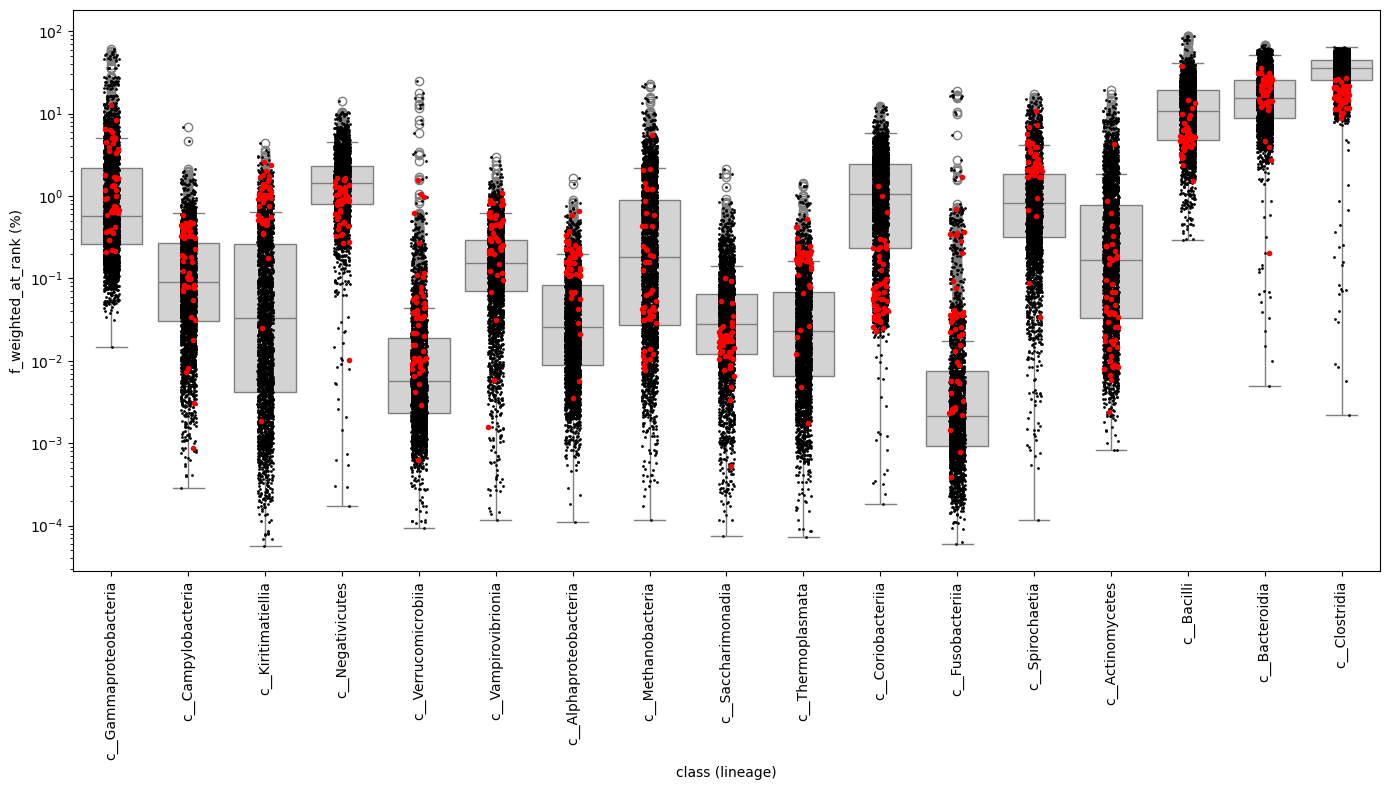

In [19]:
create_plot2(df2, df_h, df)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_plot2(df, df_highlight, dfm):
    # make lineage labels shorter: only keep part starting from "c__"
    df = df.copy()
    df["lineage"] = df["lineage"].str.extract(r"(c__.+)$")

    # sort order by median fraction
    median_order = dfm.groupby("name")["diff"].median().sort_values(ascending=False).index
    
    plt.figure(figsize=(14,8))  # bigger plot
    
    # base boxplot
    sns.boxplot(
        data=df, x="lineage", y="f_weighted_at_rank",
        order=median_order, color="lightgray"
    )
    
    # all points in black
    sns.stripplot(
        data=df, x="lineage", y="f_weighted_at_rank",
        order=median_order, color="black",
        size=2, jitter=True
    )
    
    # highlight subset in red
    df_highlighted = df[df["query_name"].isin(df_highlight["query_name"])]
    sns.stripplot(
        data=df_highlighted, x="lineage", y="f_weighted_at_rank",
        order=median_order, color="red",
        size=4, jitter=True  # slightly bigger red dots
    )
    
    # formatting
    plt.xticks(rotation=90)
    plt.yscale("log")              # log scale for y-axis
    plt.ylabel("f_weighted_at_rank (%)")
    plt.xlabel("class (lineage)")
    plt.tight_layout()
   # plt.show()
    #plt.savefig('../plots/250908_sourmash_fraction_classSinglem.png')
